**Heart disese prediction**

**1.Import libraries**

In [40]:
#for prepossing and visulization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.cm import rainbow
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#for feature engineering and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

**2.Read Data**

In [48]:
df=pd.read_csv("C:/Users/abina/OneDrive/Desktop/ML/dataset.csv")

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* IN our dataset has 303 rows and 13 features along with 1 target columns which we wish to predict and there is no misssing values. 

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Explore Visualize and Understanding the data**

* Based on the correlation matrix, we can identify which features are most strongly associated with the target variable. 
* We can also see which features are highly correlated with each other, which can help in feature selection and model building.

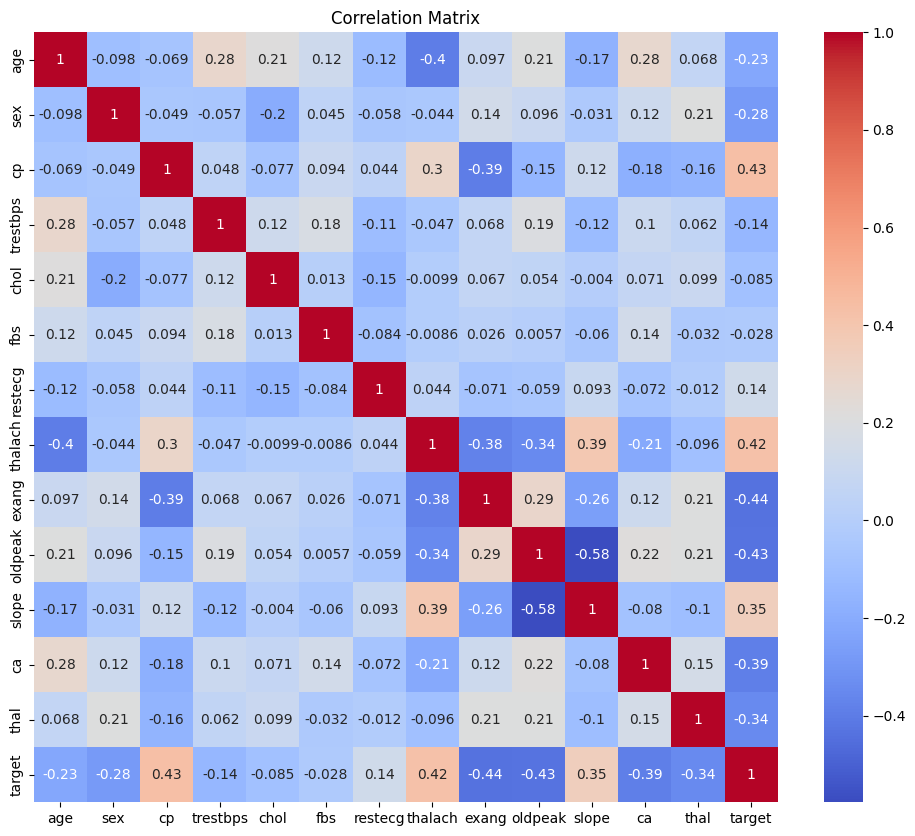

In [7]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations from the Correlation Matrix:

* 1. Strong Positive Correlation:
*   - `cp` (chest pain type) and `target` show a strong positive correlation, indicating that individuals with higher chest pain types are more likely to have heart disease.
*    - `thalach` (maximum heart rate) and `target` have a strong negative correlation, indicating that higher maximum heart rates are associated with a lower risk of heart disease.
* 2. Moderate Positive Correlation:
*    - `slope` (the slope of the peak exercise ST segment) and `target` have a moderate positive correlation, indicating that individuals with a positive slope are more likely to have heart disease.
*    - `oldpeak` (ST depression induced by exercise relative to rest) and `target` have a moderate negative correlation, indicating that higher ST depression values are associated with a higher risk of heart disease.
* 3. Moderate Negative Correlation:
*    - `exang` (exercise induced angina) and `target` have a moderate negative correlation, indicating that individuals with exercise-induced angina are less likely to have heart disease.
* 4. Weak or No Correlation:
*    - Some features, such as `sex`, `fbs`, and `restecg`, show weak or no correlation with the `target` variable. This indicates that these features might not be strong predictors of heart disease in this dataset.
* 5. Correlation Among Features:
*    - Note that some features have moderate correlations with each other. For example, `ca` (number of major vessels colored by fluoroscopy) and `oldpeak` show a moderate positive correlation. This suggests that these features may be related and might be providing similar information.


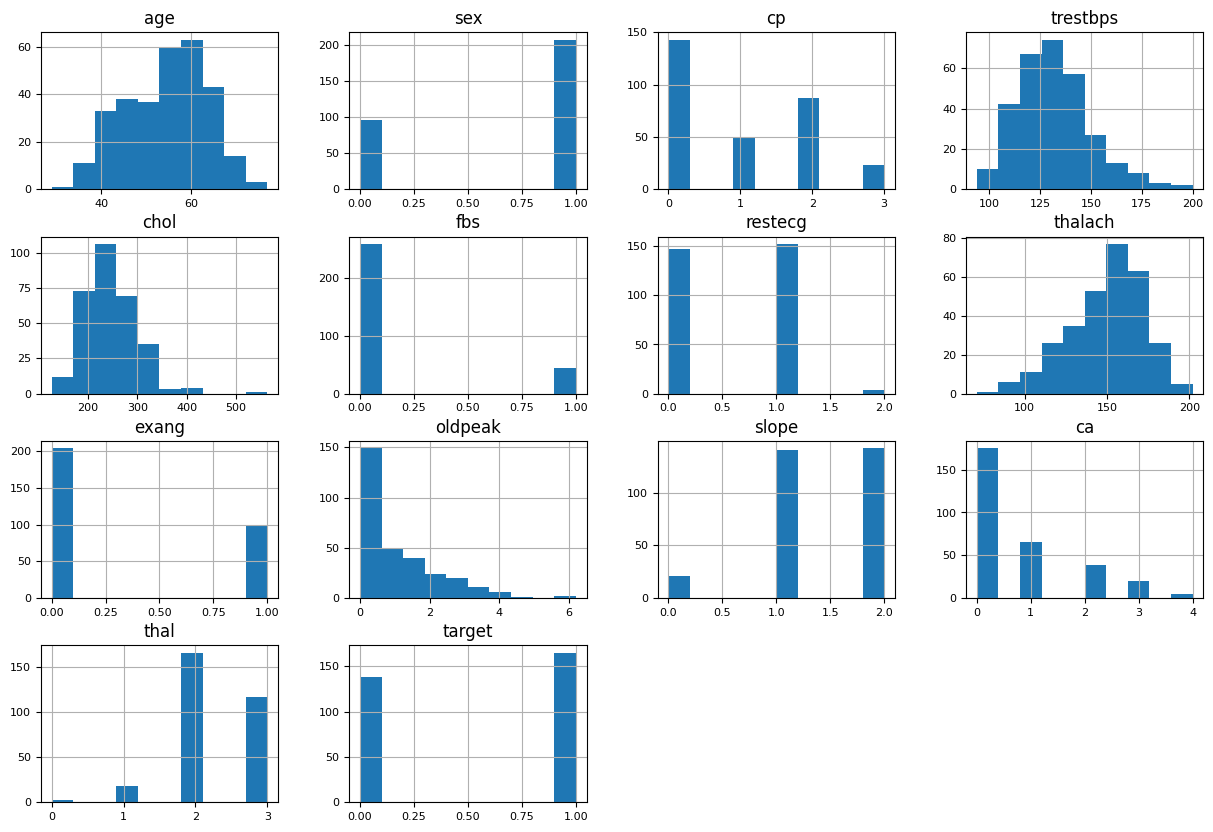

In [8]:
df.hist(figsize=(15, 10), xlabelsize=8, ylabelsize=8); # Increase the figure size and set the number of bins
#plt.tight_layout() # Adjust the layout to prevent overlapping labels

* 1. Age Distribution: The age distribution appears to be roughly normal, with a slight skew towards older ages.
* 2. Resting Blood Pressure (trestbps): The distribution is slightly skewed to the right, indicating a possible presence of outliers with higher blood pressure. 
* 3. Cholesterol (chol): The distribution also shows a slight right skew, with a possible concentration of individuals with higher cholesterol levels.
* 4. Maximum Heart Rate Achieved (thalach): The distribution of maximum heart rate is somewhat skewed to the left, potentially indicating a concentration of individuals with lower maximum heart rates.
* 5. Oldpeak (ST depression induced by exercise relative to rest): The distribution appears to be heavily skewed to the right. This suggests a concentration of individuals with lower ST depression values, but potentially some with significantly higher values.
* 6. Other Variables (sex, cp, fbs, restecg, exang, slope, ca, thal): These variables seem to be categorical and are represented by their frequency counts.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

target
0    138
1    165
dtype: int64


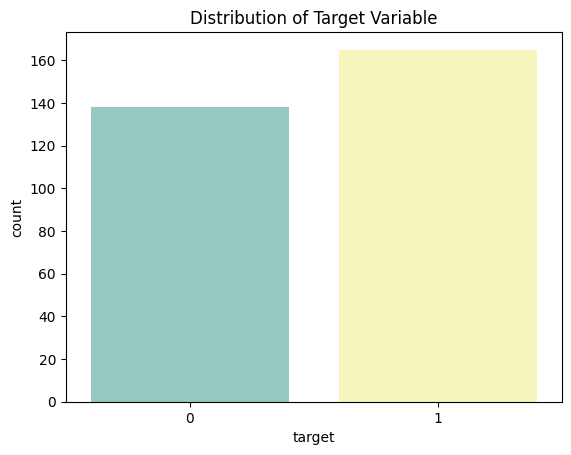

In [20]:
# Explore the distribution of target variable
print(df.groupby("target").size())
sns.countplot(x='target' ,data=df,palette='Set3')
plt.title('Distribution of Target Variable')
plt.show()


**Data Preprocessing**

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [24]:
df=pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg','exang', 'ca', 'thal'])

In [25]:
std_scl=StandardScaler()
col_to_scl=['age','trestbps','chol', 'thalach', 'oldpeak']
df[col_to_scl]=std_scl.fit_transform(df[col_to_scl])

split our dataset into training and testing

In [26]:
x=df.drop(["target"],axis=1)
y=df.target

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 0)

**SUPPORT VECTOR CLASSIFIER**

- The goal of an SVM is to find the the optimal HYPERPLANE that seperate data points into different classes
- They are particularly effictive with dealing with high dimensionality data and Non -linear relationships
* There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [65]:
svc_scores=[]
kernels=['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_model=SVC(kernel=kernels[i])
    svc_model.fit(x_train,y_train)
    svc_scores.append(svc_model.score(x_test,y_test))

plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

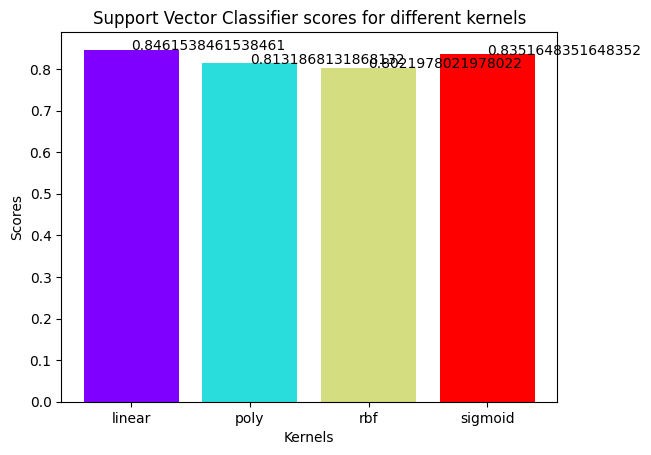

In [66]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `linear` kernel performed the best, being slightly better than Other kernel.

In [67]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 84.61538461538461% with linear kernel.


**Decision Tree Classiier**

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of `max_features` and see which returns the best accuracy.

In [42]:
dt_score=[]
for i in range(1,len(x.columns)+1):
    dt_model=DecisionTreeClassifier(max_features=i)
    dt_model.fit(x_train,y_train)
    dt_score.append(dt_model.score(x_test,y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

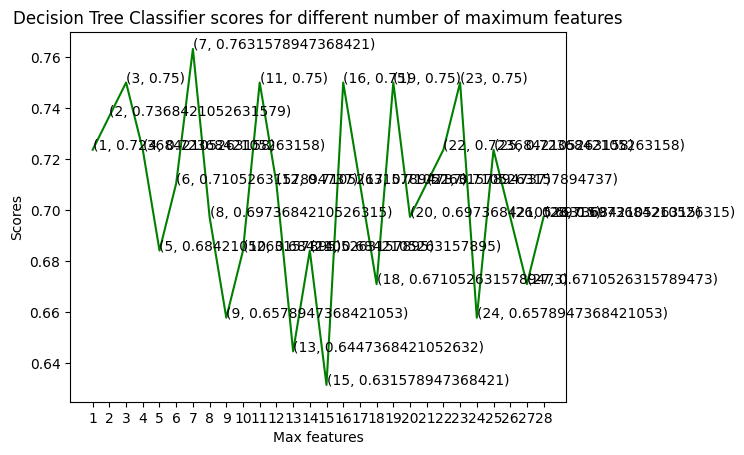

In [46]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_score, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_score[i-1], (i, dt_score[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at maximum features, `7`

In [72]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_score[6]*100, [7]))

The score for Decision Tree Classifier is 76.31578947368422% with [7] maximum features.


### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. 
I then applied four Machine Learning algorithms,  `Support Vector Classifier`, `Decision Tree Classifier` i have varied parameters across each model to improve their scores.
In the end,`Support Vector Classifier`  achieved the highest score of `84%` with  `Linear kernel`